## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

/Users/shrijithjayasamraj/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.2'

In [2]:
G = ox.graph_from_place("Delhi, India", network_type='drive',custom_filter='["highway"~"motorway|trunk|primary|secondary"]')

## Visualizing the map 

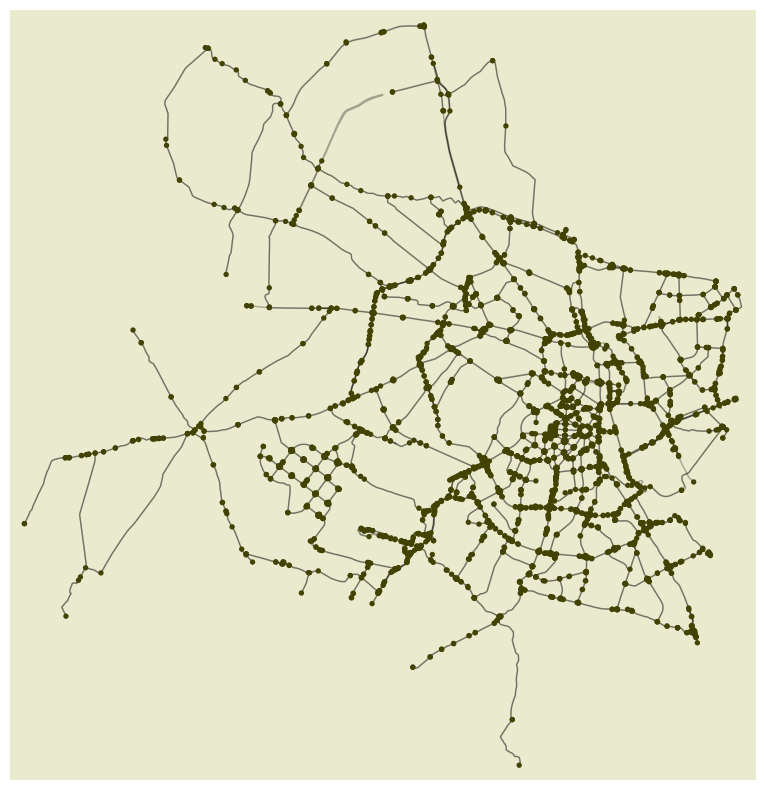

In [3]:
fig, ax = ox.plot_graph(G, bgcolor='#EAEACE',node_color='#424302',edge_color= '#000000',edge_alpha= 0.3,node_alpha= 1,figsize=(10,10))

## Visualizing as nodes and edges

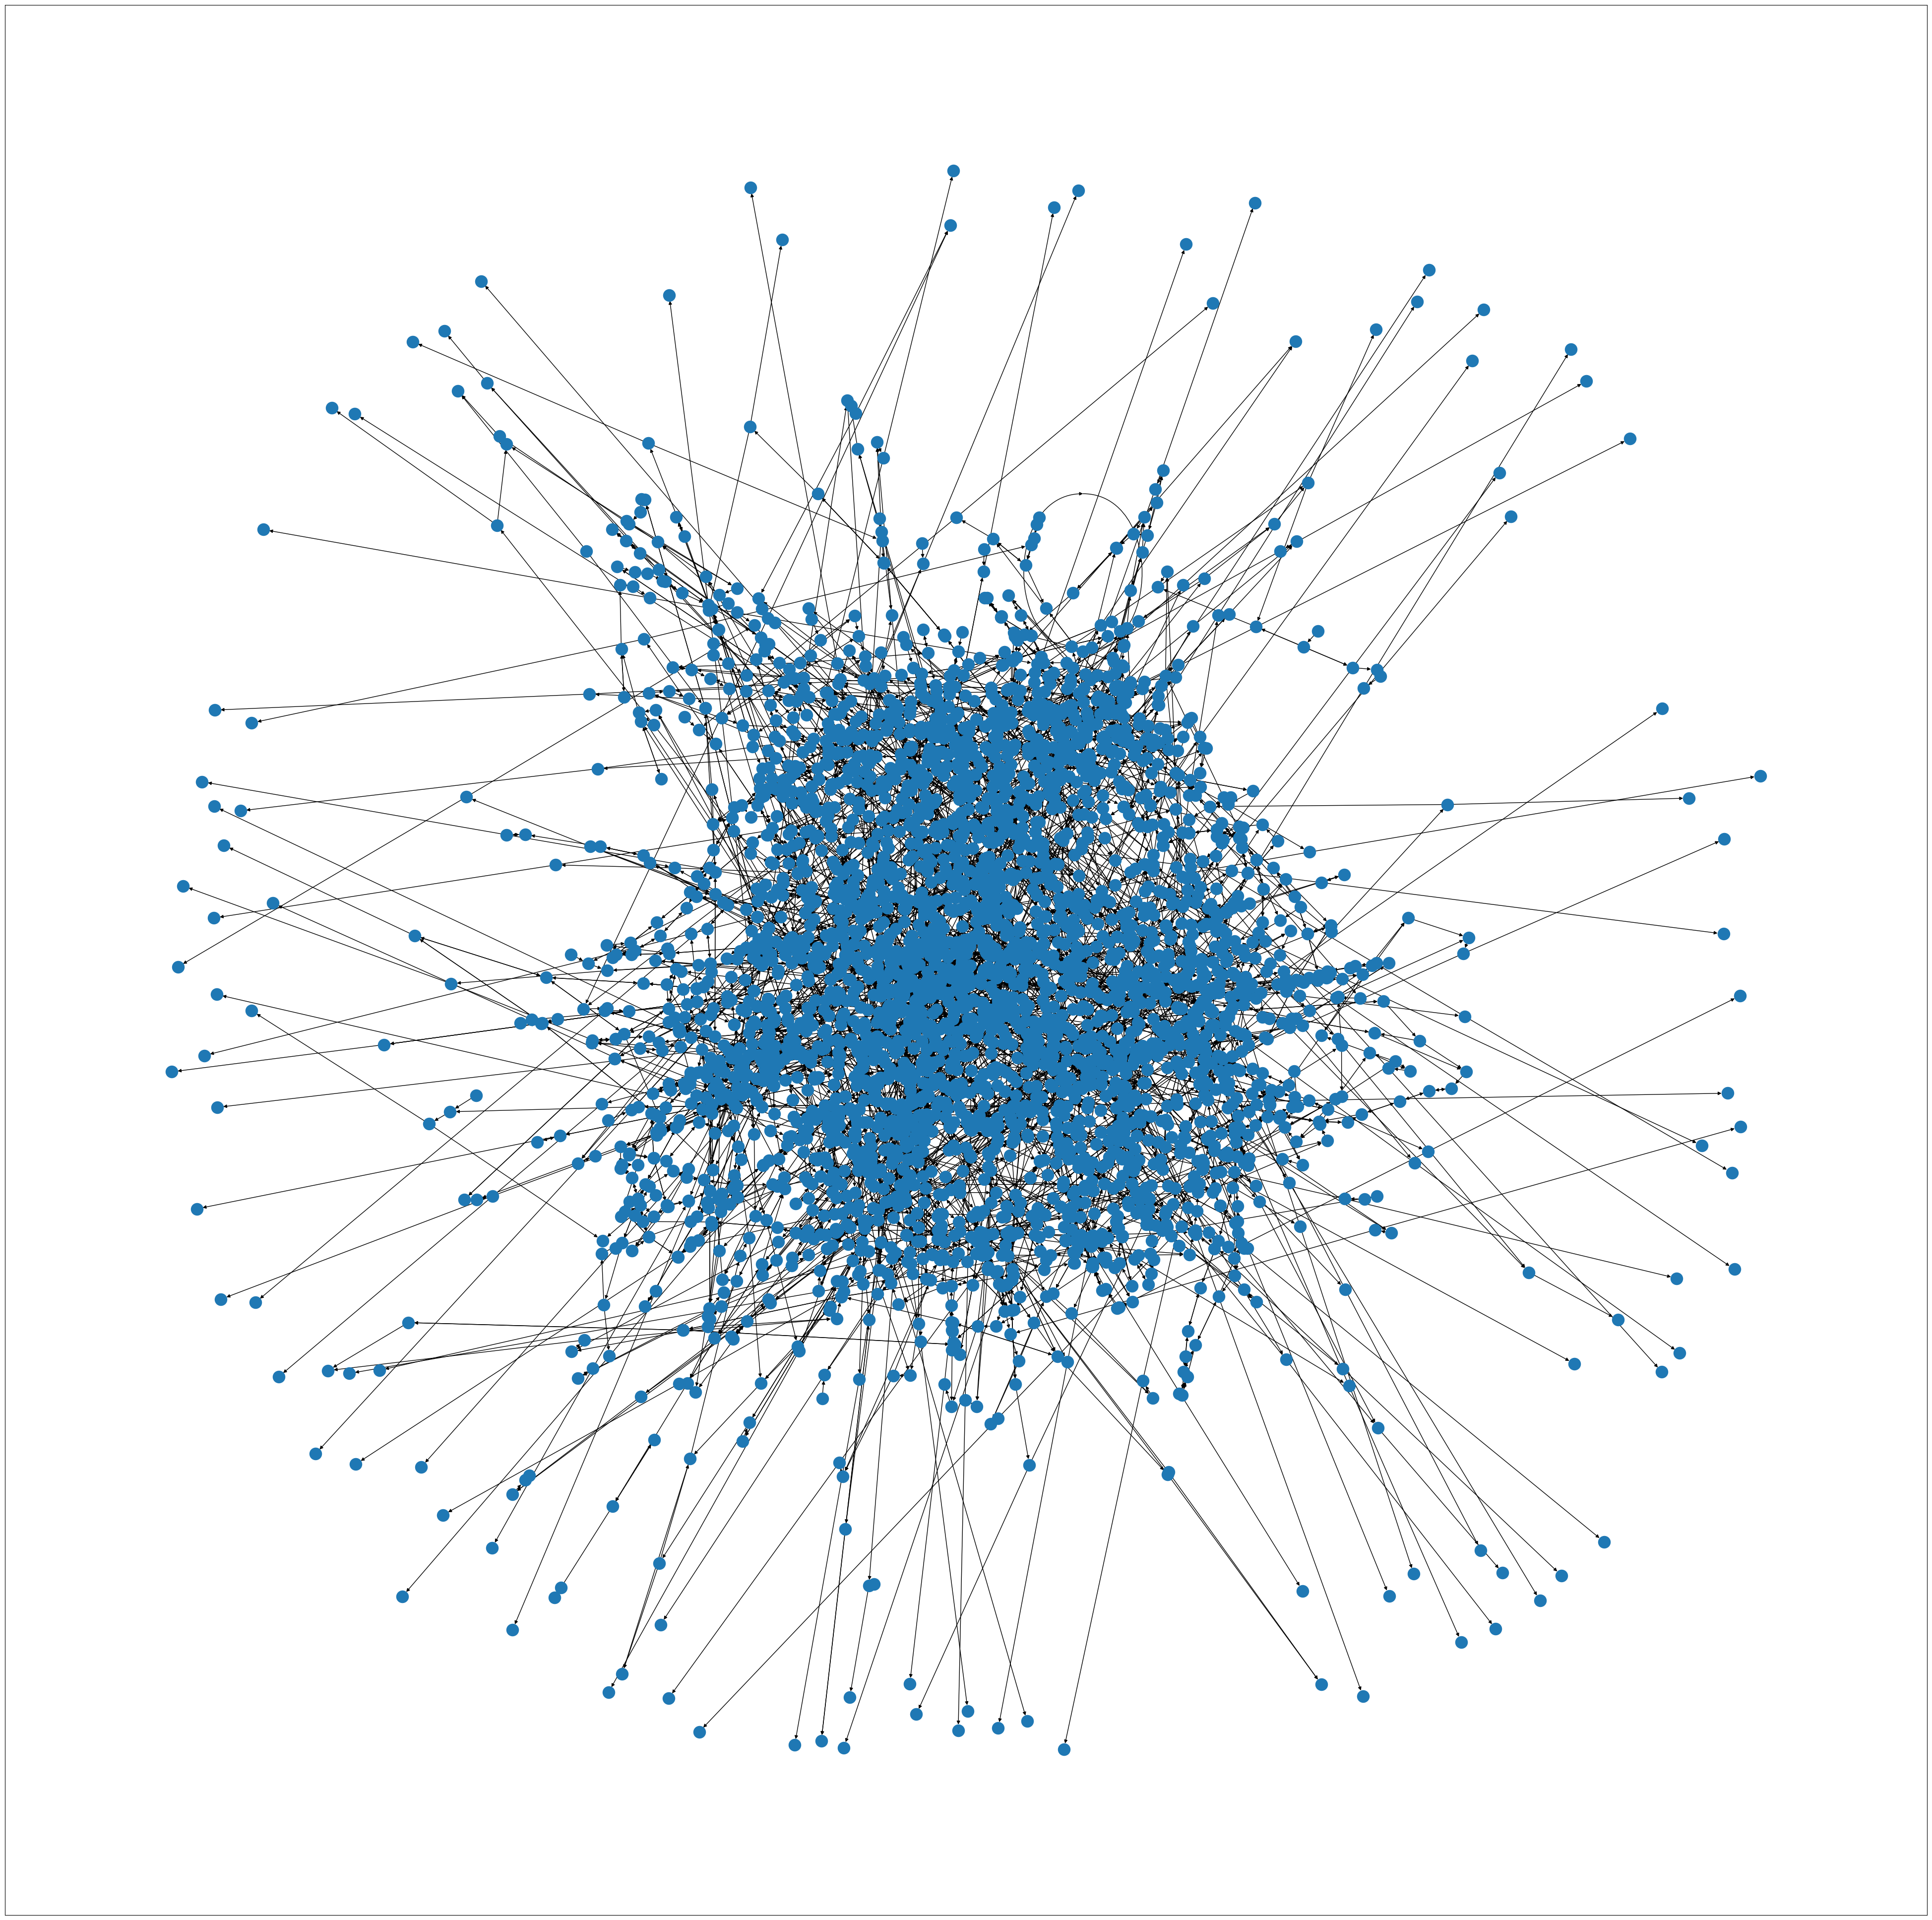

In [4]:
plt.figure(figsize=(50,50))
nx.draw_networkx(G,with_labels=False)

In [5]:
nodes, edges = ox.utils_graph.graph_to_gdfs(G)

In [6]:
nodes.head()

y          x  street_count          highway  ref  \
osmid                                                                 
58056528   28.559390  77.171000             4              NaN  NaN   
60890393   28.580619  77.174953             3              NaN  NaN   
175610054  28.569235  77.193175             3              NaN  NaN   
246513647  28.594839  77.167080             3              NaN  NaN   
246518180  28.601932  77.180677             4  traffic_signals  NaN   

                            geometry  
osmid                                 
58056528   POINT (77.17100 28.55939)  
60890393   POINT (77.17495 28.58062)  
175610054  POINT (77.19317 28.56923)  
246513647  POINT (77.16708 28.59484)  
246518180  POINT (77.18068 28.60193)

In [7]:
edges.head()

osmid  oneway  \
u         v          key                                            
58056528  301037382  0                          590609974    True   
          7612915570 0             [558065085, 558065079]    True   
60890393  6110396131 0                           25744598    True   
          280740684  0    [583917363, 28746244, 44317159]    True   
175610054 6191555841 0                          579272357    True   

                                                              name  \
u         v          key                                             
58056528  301037382  0                         Nelson Mandela Marg   
          7612915570 0                                  Palam Marg   
60890393  6110396131 0                                         NaN   
          280740684  0    [Moti Bagh Flyover, Mahatma Gandhi Marg]   
175610054 6191555841 0                                         NaN   

                               highway reversed   length  \
u         v          key                                   
58056528  301037382  0         primary    False   31.509   
          7612915570 0         primary    False  325.637   
60890393  6110396131 0    primary_link    False  156.011   
          280740684  0         primary    False  621.827   
175610054 6191555841 0    primary_link    False  275.075   

                                                                   geometry  \
u         v          key                                                      
58056528  301037382  0    LINESTRING (77.17100 28.55939, 77.17125 28.55957)   
          7612915570 0    LINESTRING (77.17100 28.55939, 77.17013 28.560...   
60890393  6110396131 0    LINESTRING (77.17495 28.58062, 77.17504 28.580...   
          280740684  0    LINESTRING (77.17495 28.58062, 77.17502 28.580...   
175610054 6191555841 0    LINESTRING (77.19317 28.56923, 77.19255 28.569...   

                         bridge  ref lanes junction maxspeed width access  \
u         v          key                                                    
58056528  301037382  0      NaN  NaN   NaN      NaN      NaN   NaN    NaN   
          7612915570 0      NaN  NaN   NaN      NaN      NaN   NaN    NaN   
60890393  6110396131 0      NaN  NaN   NaN      NaN      NaN   NaN    NaN   
          280740684  0      yes  NaN   NaN      NaN      NaN   NaN    NaN   
175610054 6191555841 0      NaN  NaN   NaN      NaN      NaN   NaN    NaN   

                         tunnel service  
u         v          key                 
58056528  301037382  0      NaN     NaN  
          7612915570 0      NaN     NaN  
60890393  6110396131 0      NaN     NaN  
          280740684  0      NaN     NaN  
175610054 6191555841 0      NaN     NaN

## Closeness Centrality

In [8]:
closeness_centrality = nx.closeness_centrality(G)

In [9]:
df = pd.DataFrame(data=pd.Series(closeness_centrality).sort_values(), columns=['cc'])

In [10]:
df['colors']= ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)

In [11]:
df = df.reindex(G.nodes())

In [12]:
nc = df['colors'].tolist()

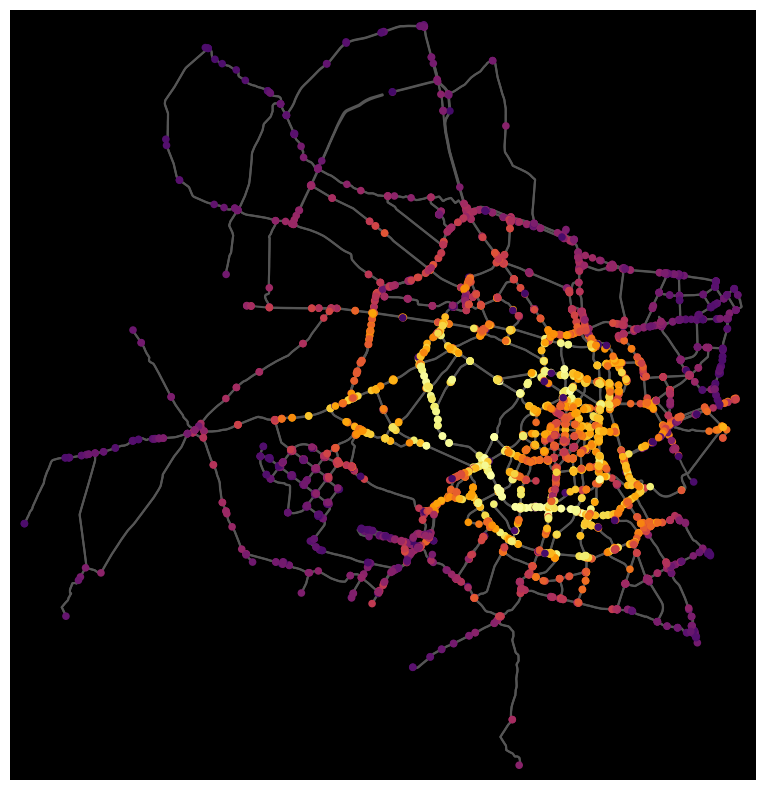

In [13]:
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1,figsize=(10,10))

## Closeness centrality with edge representation

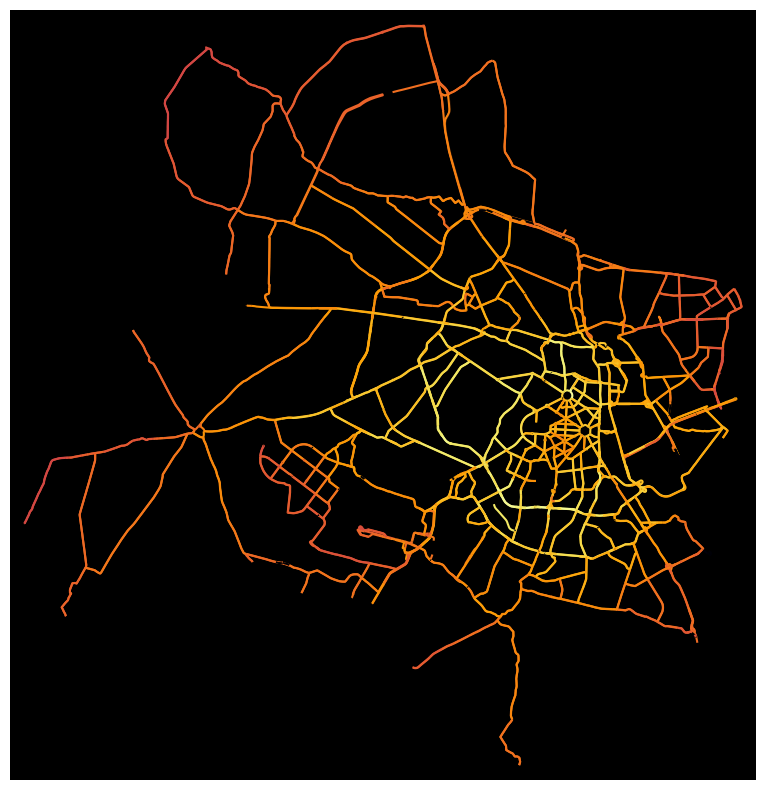

In [14]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

ev = [edge_centrality[edge + (0,)] for edge in G.edges()]


norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]


fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,figsize=(10,10))

## Betweenness Centrality

In [15]:
betweenness = nx.betweenness_centrality(G)

In [16]:
nc = [betweenness[node] for node in G.nodes()]
ns = [betweenness[node]*2000 for node in G.nodes()]

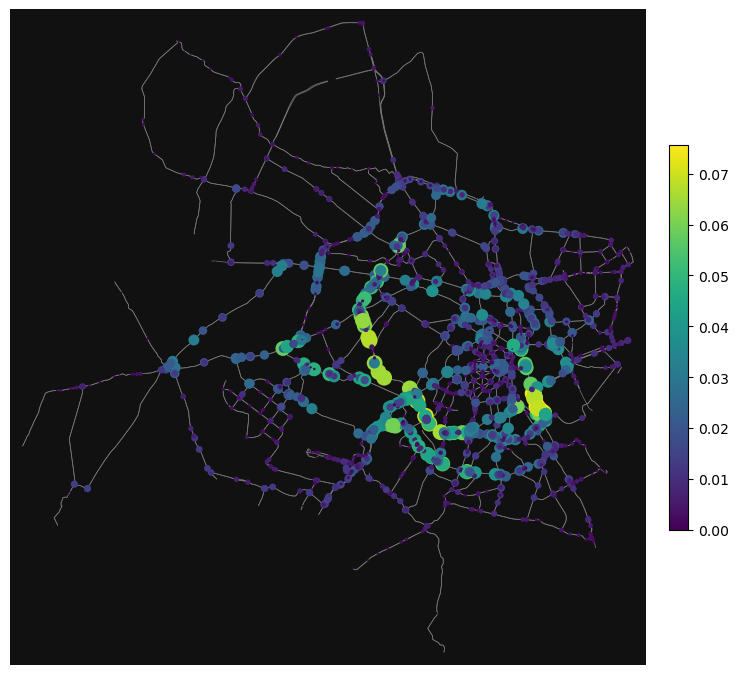

In [17]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, node_zorder=2, edge_color='#777777', edge_linewidth=0.5, figsize=(10, 10), show=False, close=False)

cbar = fig.colorbar(ax.get_children()[1], orientation='vertical', shrink=0.5, pad=0.03)

plt.show()

In [18]:
nodes['betweenness_centrality'] = nodes.index.map(betweenness)

In [19]:
top_betweenness = nodes.sort_values('betweenness_centrality', ascending=False).head(10)
top_betweenness

y          x  street_count            highway  ref  \
osmid                                                                    
1819107776  28.584214  77.261916             3                NaN  NaN   
6539177461  28.586900  77.259299             3                NaN  NaN   
838835389   28.592423  77.257458             3                NaN  NaN   
838835408   28.595689  77.256257             3  motorway_junction  NaN   
1549892457  28.590847  77.168557             3                NaN  NaN   
60890393    28.580619  77.174953             3                NaN  NaN   
9104730682  28.585891  77.259912             3                NaN  NaN   
1819107722  28.582865  77.264399             3                NaN  NaN   
308720476   28.595083  77.256738             3                NaN  NaN   
838835414   28.593266  77.257392             3                NaN  NaN   

                             geometry  betweenness_centrality  
osmid                                                          
1819107776  POINT (77.26192 28.58421)                0.075775  
6539177461  POINT (77.25930 28.58690)                0.075775  
838835389   POINT (77.25746 28.59242)                0.073136  
838835408   POINT (77.25626 28.59569)                0.073136  
1549892457  POINT (77.16856 28.59085)                0.071202  
60890393    POINT (77.17495 28.58062)                0.071202  
9104730682  POINT (77.25991 28.58589)                0.069257  
1819107722  POINT (77.26440 28.58286)                0.069110  
308720476   POINT (77.25674 28.59508)                0.068599  
838835414   POINT (77.25739 28.59327)                0.068599

In [20]:
lis_betweenness = []
for i, node1 in top_betweenness.iterrows():
    lis_betweenness.append(i)
lis_betweenness

[1819107776,
 6539177461,
 838835389,
 838835408,
 1549892457,
 60890393,
 9104730682,
 1819107722,
 308720476,
 838835414]

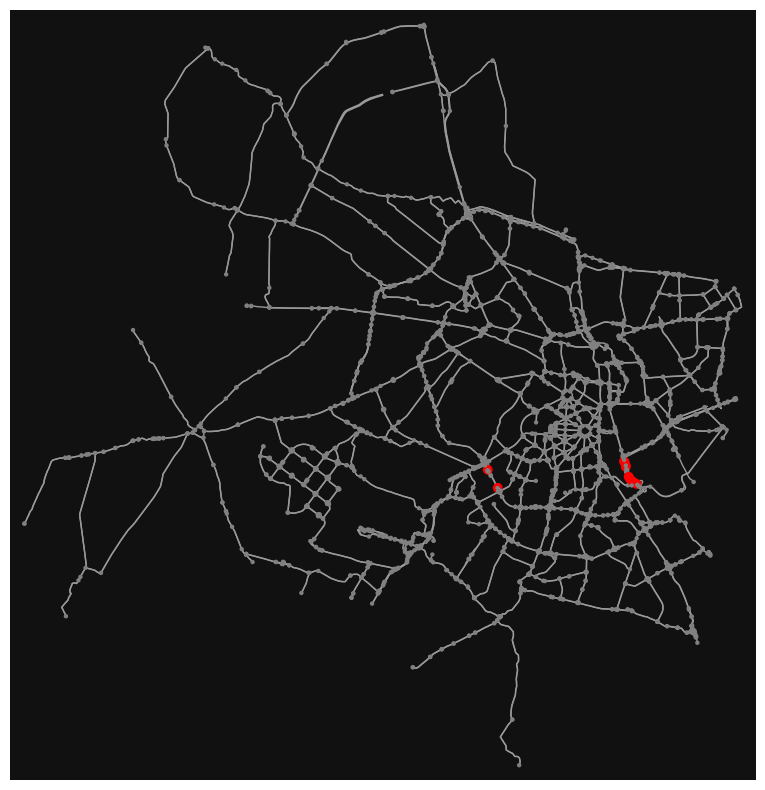

In [21]:
fig, ax = ox.plot_graph(G, node_color=['red' if node in lis_betweenness else 'gray' for node in G.nodes()], node_size=[50 if node in lis_betweenness else 10 for node in G.nodes()],figsize=(10,10))
for node in lis_betweenness:
    ax.collections[-1].set_zorder(1000)
    
ax.autoscale_view()

In [22]:
node_id = 1819107722  # replace with the ID of the node you're interested in
node_edges = [(u, v) for (u, v, k, data) in G.edges(keys=True, data=True) if v == node_id or u == node_id]

print(node_edges)

[(1819107722, 4273724334), (1819107722, 4543284174), (9104730682, 1819107722)]


## Degree Centrality

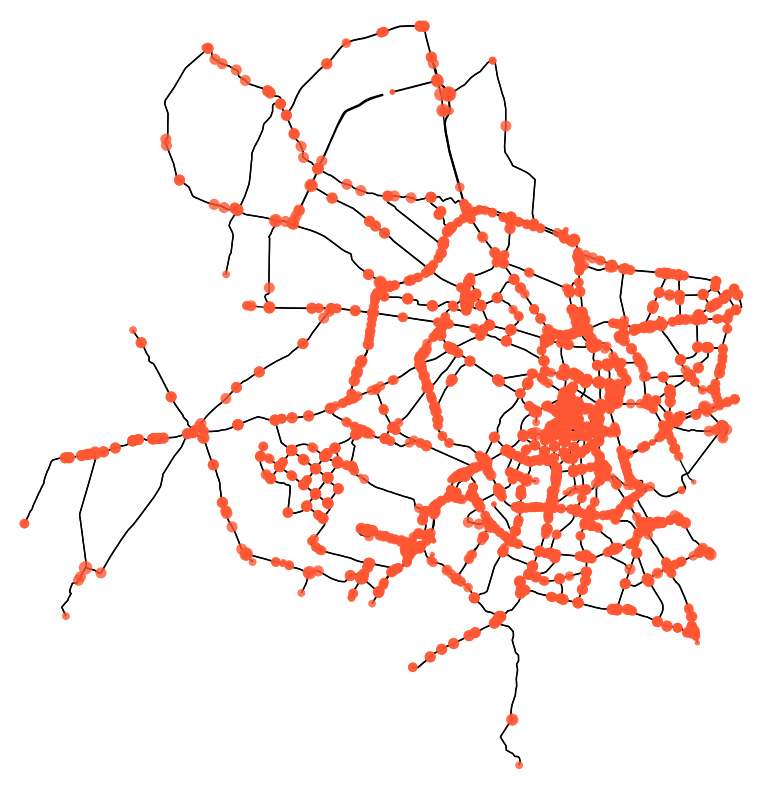

In [23]:

degree_centrality = nx.degree_centrality(G)


node_sizes = [60000 * degree_centrality[node] for node in G.nodes()]


fig, ax = ox.plot_graph(G, node_size=node_sizes, node_color='#FF5733', edge_color='k', bgcolor='w', figsize=(10,10),node_alpha=0.8)


In [24]:
nodes['degree_centrality'] = nodes.index.map(degree_centrality)

top_degree = nodes.sort_values('degree_centrality', ascending=False).head(10)

lis_degree = []
for i, node1 in top_degree.iterrows():
    lis_degree.append(i)
lis_degree

[5905574211,
 249791204,
 413880490,
 3644093241,
 2622332748,
 9860256066,
 919598704,
 472499613,
 6593517829,
 6657552005]

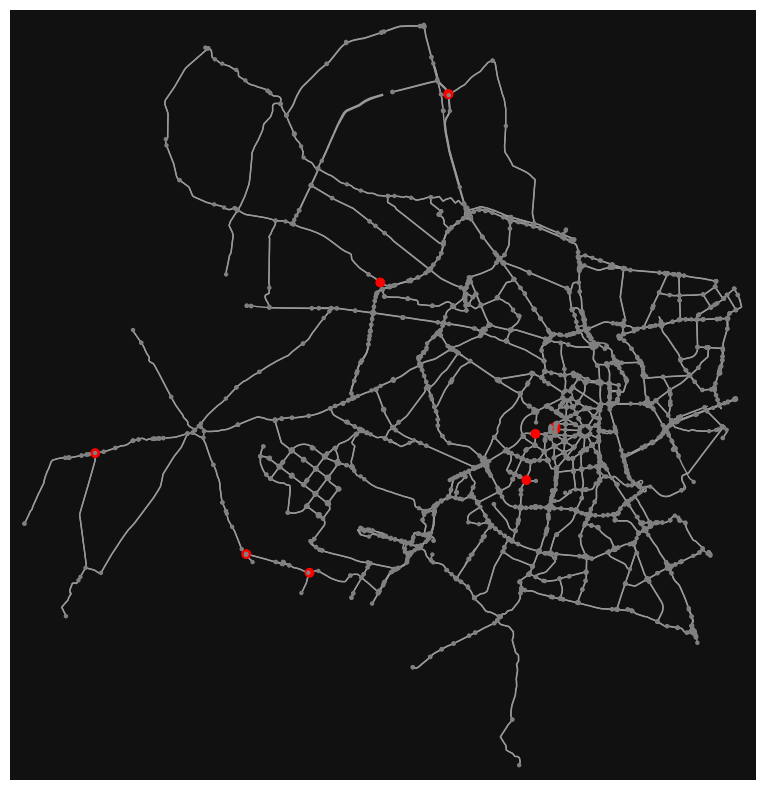

In [25]:
fig, ax = ox.plot_graph(G, node_color=['red' if node in lis_degree else 'gray' for node in G.nodes()], node_size=[50 if node in lis_degree else 10 for node in G.nodes()],figsize=(10,10))
for node in lis_degree:
    ax.collections[-1].set_zorder(1000)
    
ax.autoscale_view()

## Eigen vector centrality

In [26]:
eigen_centrality = nx.eigenvector_centrality_numpy(G)

In [27]:
node_size = [v * 10 for v in eigen_centrality.values()]

In [28]:
import numpy as np

min_value = np.min(node_size)
max_value = np.max(node_size)
min_range = 10
max_range = 100

normalized_values = [(((v - min_value) / (max_value - min_value)) * (max_range - min_range)) + min_range for v in node_size]


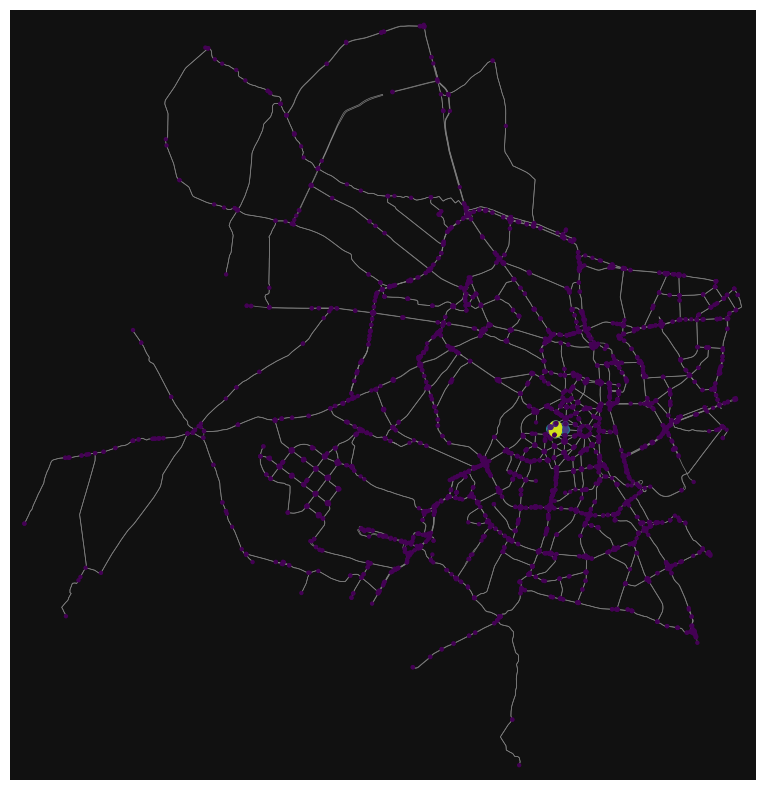

In [29]:
edge_width = 0.5
fig, ax = ox.plot_graph(G, node_size=normalized_values, edge_color='gray', edge_linewidth=edge_width, show=False, close=False,figsize=(10,10),node_color= normalized_values)

plt.show()

In [30]:
nodes['eigen_centrality'] = nodes.index.map(eigen_centrality)

top_eigen = nodes.sort_values('eigen_centrality', ascending=False).head(10)

lis_eigen = []
for i, node1 in top_eigen.iterrows():
    lis_eigen.append(i)
lis_eigen

[249791204,
 6720409811,
 6720409790,
 3644093241,
 267197928,
 267196357,
 267196276,
 3749161008,
 6720378881,
 6485009721]

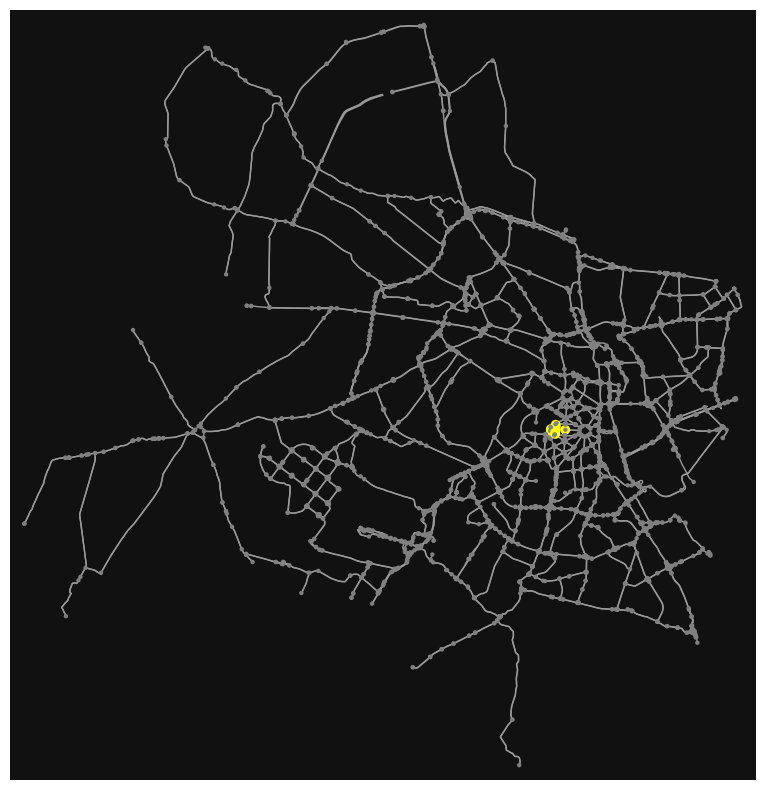

In [31]:
fig, ax = ox.plot_graph(G, node_color=['yellow' if node in lis_eigen else 'gray' for node in G.nodes()], node_size=[50 if node in lis_eigen else 10 for node in G.nodes()],figsize=(10,10))
for node in lis_eigen:
    ax.collections[-1].set_zorder(1000)
    
ax.autoscale_view()

In [32]:
nodes['closeness'] = nodes.index.map(closeness_centrality)

top_closeness = nodes.sort_values('closeness', ascending=False).head(10)

lis_closeness = []
for i, node1 in top_closeness.iterrows():
    lis_closeness.append(i)
lis_closeness

[280740686,
 250078355,
 280740684,
 5681296954,
 5681321307,
 316066111,
 2714630359,
 5681321306,
 423735548,
 292443382]

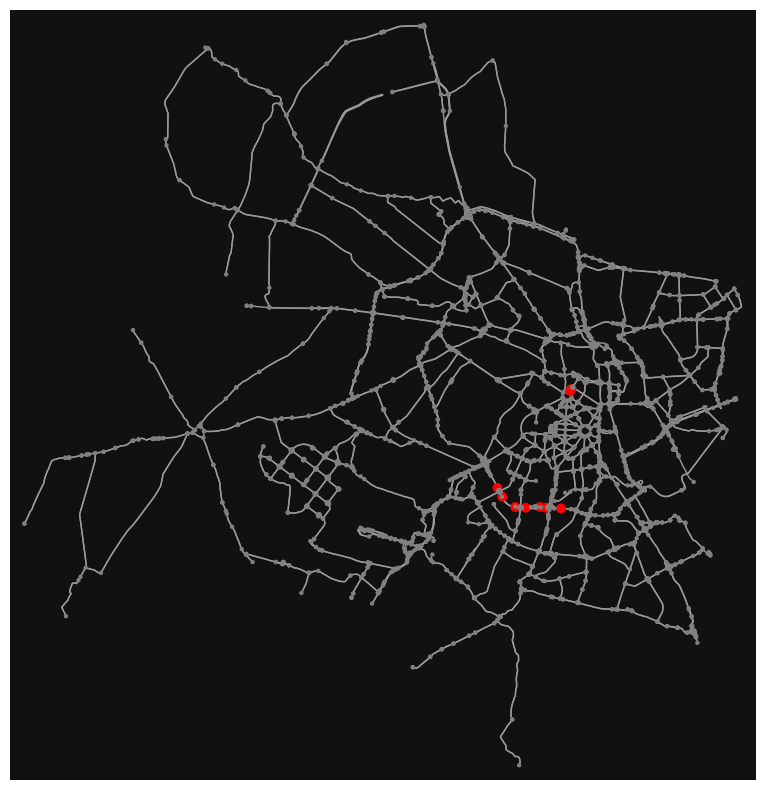

In [33]:
fig, ax = ox.plot_graph(G, node_color=['red' if node in lis_closeness else 'gray' for node in G.nodes()], node_size=[50 if node in lis_closeness else 10 for node in G.nodes()],figsize=(10,10))
for node in lis_closeness:
    ax.collections[-1].set_zorder(1000)
    
ax.autoscale_view()